## Regresion Polinomial & Feature engineering

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('winequality-red.csv')

### Red Wine Quality Data

Se aplicará regresión para crear un modelo de la calidad de vino en función de características del mismo, siendo 1 el peor vino y 10 el mejor.

Variables de entrada:
1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 

Varaible a predecir: 
12. quality (puntuacion  entre 0 y 10) 



In [3]:
data.head(11)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


### Instrucciones

1. Seleccionar y transformar(generando las combinaciones polinomiales para un polinomio de grado dos o tres a elección) las features que considere que son las mejores para predecir la calidad del vino, utilizar como minimo 2 features. Para seleccionar las features, hacer un analisis exploratorio por ejemplo(pero no limitado a ):  graficando y viendo la forma en que se comportan los datos.

 Por ejemplo, se tienen las features "a" y "b" y seleccionamos polinomio de grado 2, hacemos feature engineering para obtener :
 
 $[a,b,a^{2},b^{2},ab]$
 
 No olvidar el "bias" (parámetro multiplicado por 1) ,con lo cual el dataset puede quedar con las columnas:
 
 $[1,a,b,a^{2},b^{2},ab]$
2. Una vez transformada la data aplicar regresion lineal con las features polinomiales usando Tensorflow.

Requisitos adicionales:
* Se debe agregar al notebook un screenshot del grafo de tensorboard, simplificando(usando  names , y name_scope como visto en clase).

* Se debe generar un directorio de logs de tensorboard para cada corrida/experimento , con cada directorio identificando facilmente la configuración del experimento como visto en clase, por ejemplo para un experimento con learning rate = 0.1 , y polinomio grado 2  crear un directorio: lr=0.1_polinomio_grado=2. (Agregar al notebook un screenshot de estas gráficas)

* Concluir en markdown cual es el mejor modelo para este caso basado en la comparativa entre curvas de costo/error en tensorboard.

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Paso 1: Analisis exploratorio Simple para la eleccion de las 3 features mas significativas.

**Matriz de correlacion**

In [5]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Por los bajos parametros que se obtienen en la matriz de correlacion, no se utilizara este criterio para la eleccion de la mejro feature

#### Analisis grafico:

*NOTA: Por practicidad en cuanto al codigo se utilizaron for para generar las distintas combinaciones de graficas, sin embargo, esto tiene como efecto secundario que se tienen graficas repetidas, sin embargo, para efectos practicos esto solo afecta en que la parte de las graficas ocupa mas espacio en el notebook*

In [6]:
Y_real = np.asanyarray(data['quality'])
dictX = {0:'fixed acidity', 1:'volatile acidity',2:'citric acid',3:'residual sugar',4:'chlorides',
         5:'free sulfur dioxide',6:'total sulfur dioxide',7:'density',8:'pH',9:'sulphates', 10:'alcohol'}

Grafica de cada FeatureSQuality

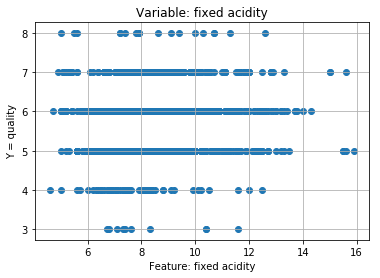

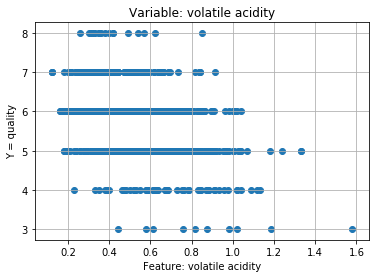

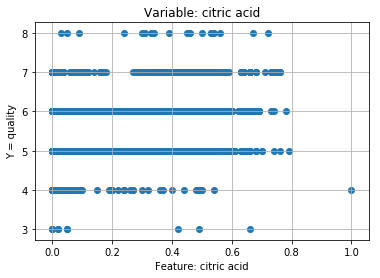

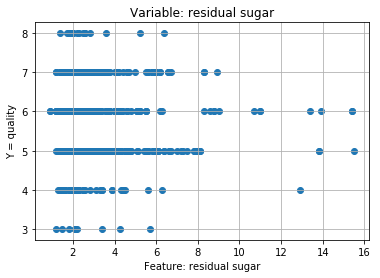

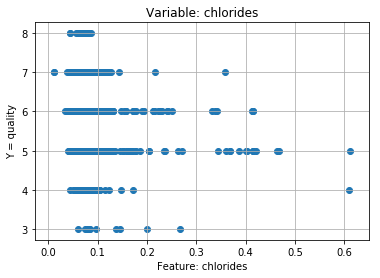

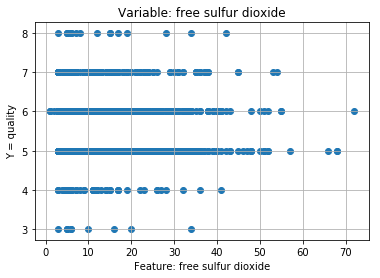

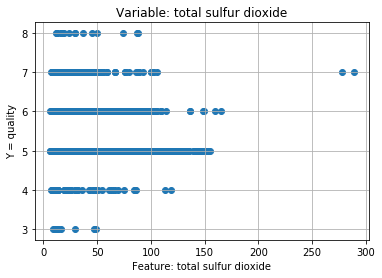

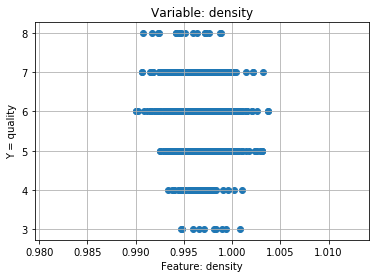

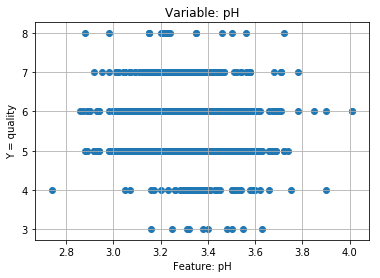

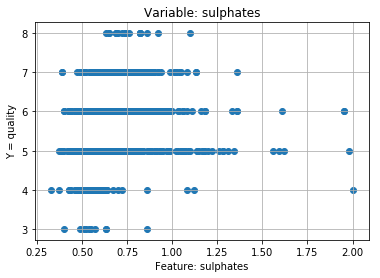

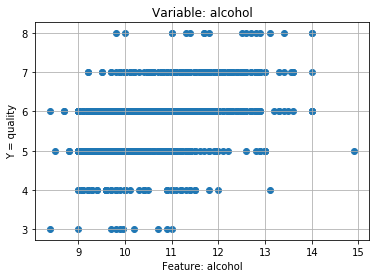

In [7]:
for i in range(11):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.grid()
    ax.scatter(data[dictX[i]],Y_real,label='Variable: '+str(i))
    ax.set_xlabel('Feature: '+str(dictX[i]))
    ax.set_ylabel('Y = quality')
    ax.set_title('Variable: '+str(dictX[i]))
    plt.show()

**En base a las graficas anteriores se dividen las features en dos categorias: Las que parecen no tener ningun tipo de correlacion con la variable independiente (mas caoticas) y las que de alguna manera parecieran tener un comportamiento mas correlacionado**

In [8]:
signifFeatures = ['volatile acidity','total sulfur dioxide','density','pH','alcohol']
nonSignFeat = []
for i in range(11):
    if dictX[i] not in signifFeatures:
        nonSignFeat.append(dictX[i])
print(nonSignFeat)

['fixed acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'sulphates']


A continuacion se crean nuevas graficas para la correlacion tomando en cuenta la combinacion de las variables "mas correlacionadas" y las "variables menos correlacionadas"

In [9]:
signifDict = {}
for i in range(len(signifFeatures)):
    signifDict[i] = signifFeatures[i]

nonSignifDict = {}
for i in range(len(nonSignFeat)):
    nonSignifDict[i] = nonSignFeat[i]
    
print(signifDict)
print(nonSignifDict)

{0: 'volatile acidity', 1: 'total sulfur dioxide', 2: 'density', 3: 'pH', 4: 'alcohol'}
{0: 'fixed acidity', 1: 'citric acid', 2: 'residual sugar', 3: 'chlorides', 4: 'free sulfur dioxide', 5: 'sulphates'}


##### Combinacion entre si de las features con mas correlacion

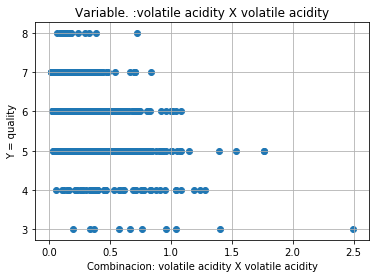

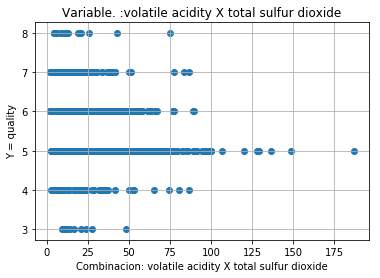

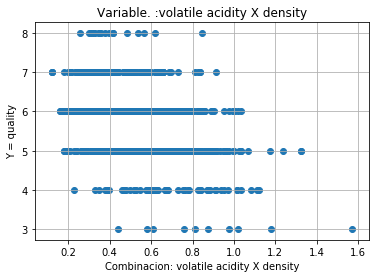

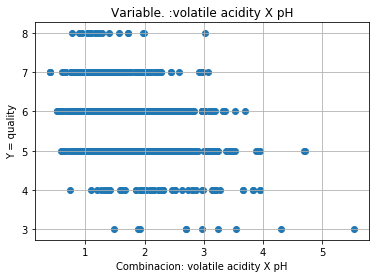

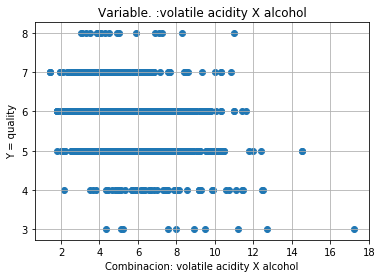

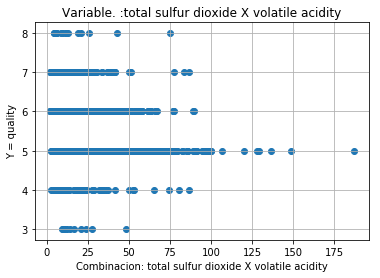

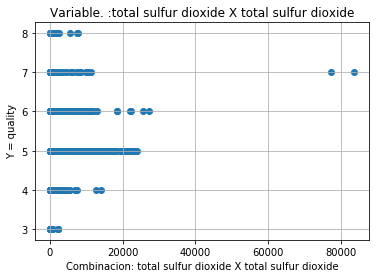

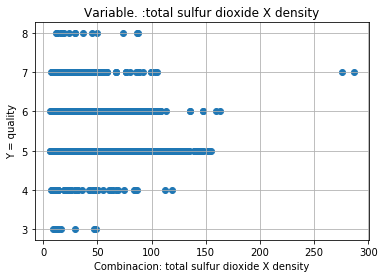

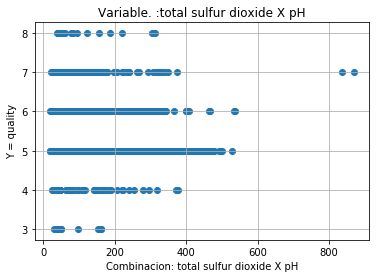

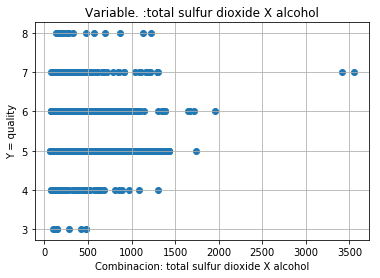

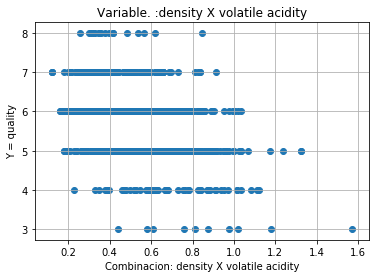

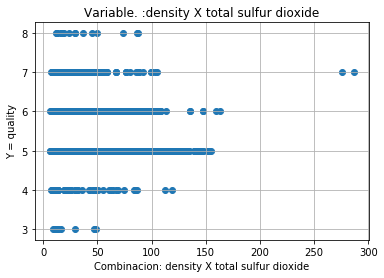

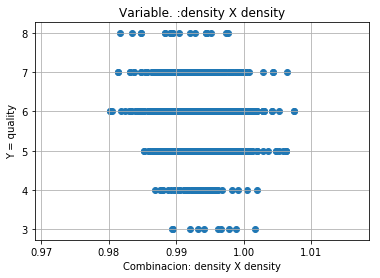

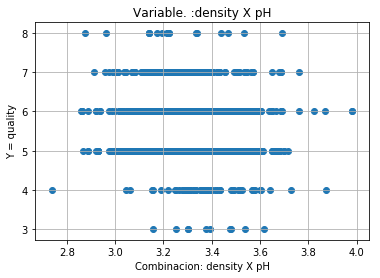

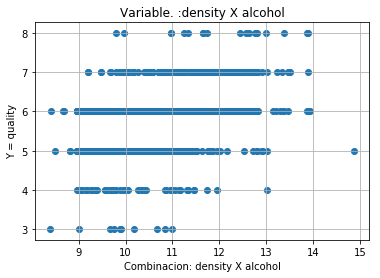

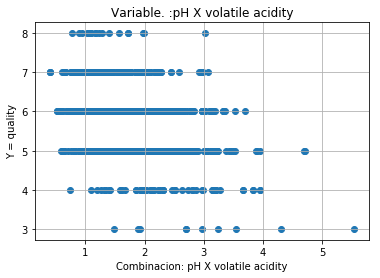

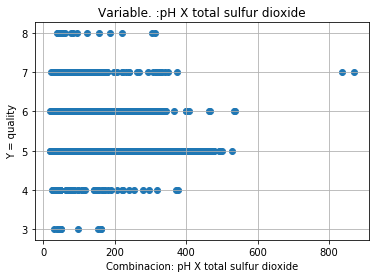

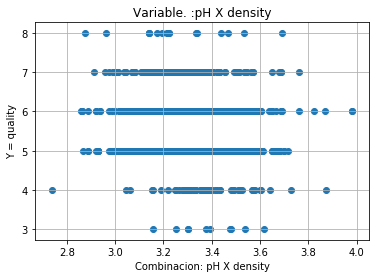

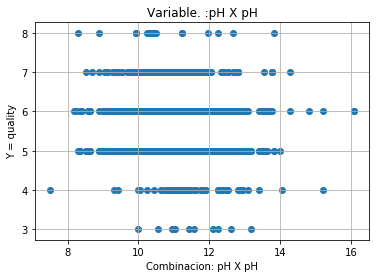

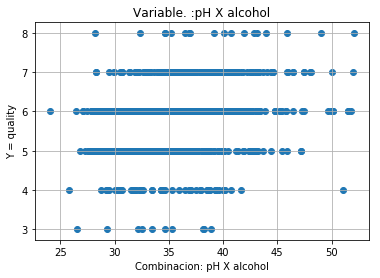

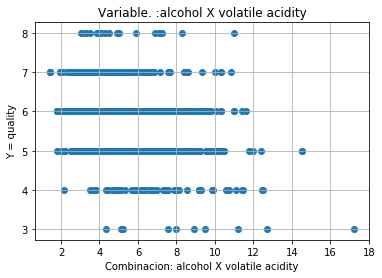

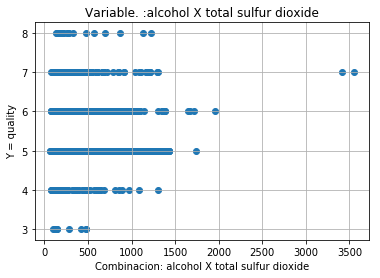

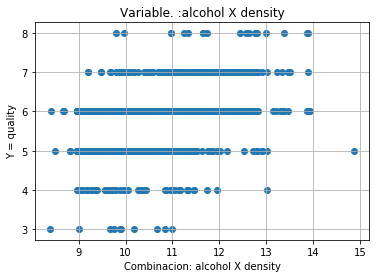

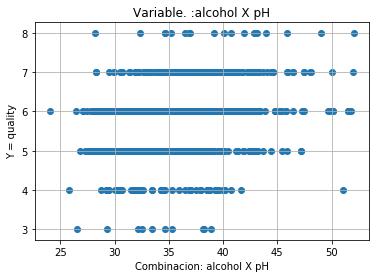

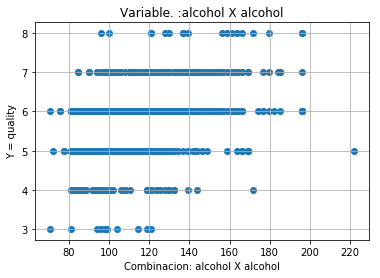

In [10]:
lista01 = []
for j in range (len(signifDict)):
    lista01 = []
    for i in range(len(signifDict)):
        lista01.append(data[signifDict[j]]*data[signifDict[i]])
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        ax.grid()
        ax.scatter(lista01[i],Y_real,label='Variable. :'+str(j)+' X '+str(i))
        ax.set_xlabel('Combinacion: '+str(signifDict[j])+' X '+str(signifDict[i]))
        ax.set_ylabel('Y = quality')
        ax.set_title('Variable. :'+str(signifDict[j])+' X '+str(signifDict[i]))
        plt.show()

##### Combinacion entre si de las features con menos correlacion

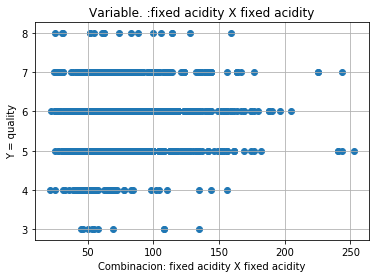

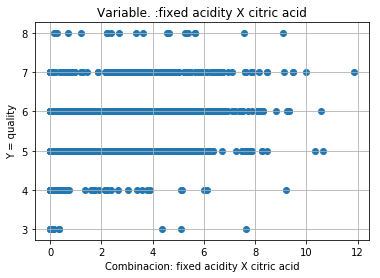

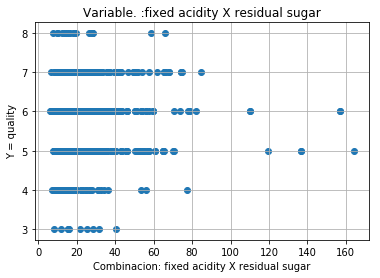

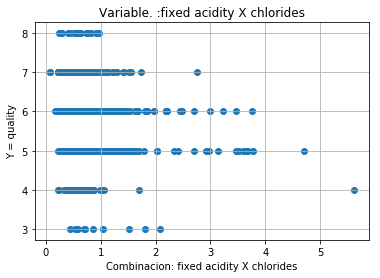

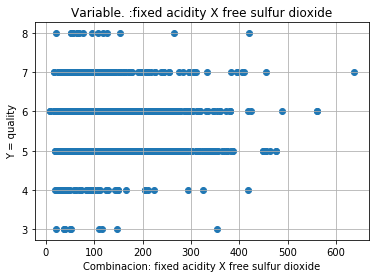

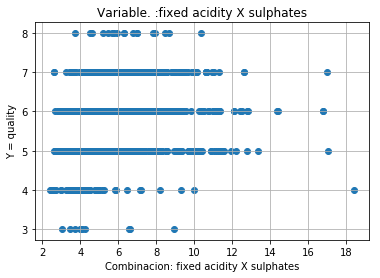

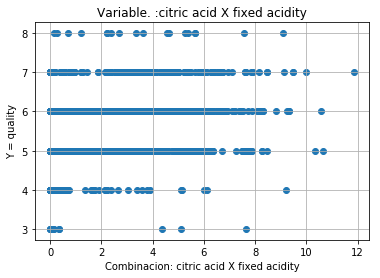

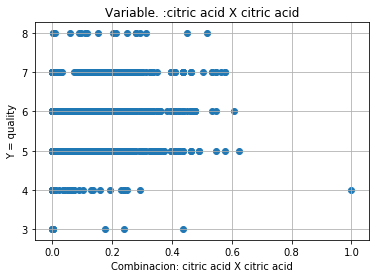

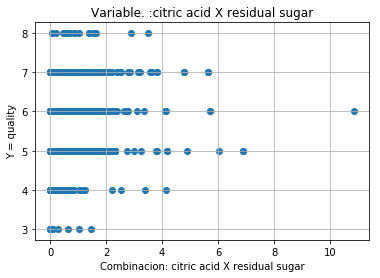

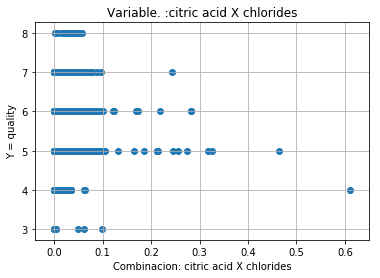

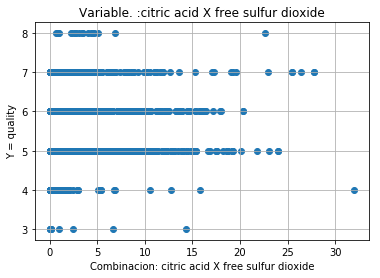

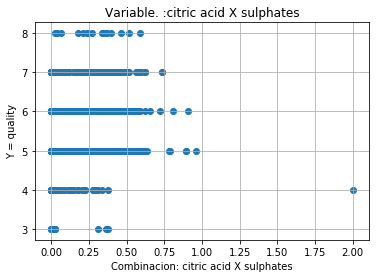

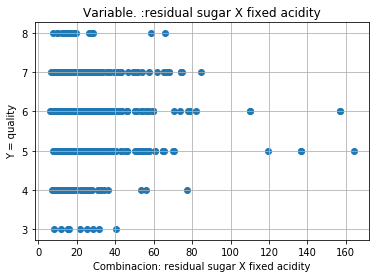

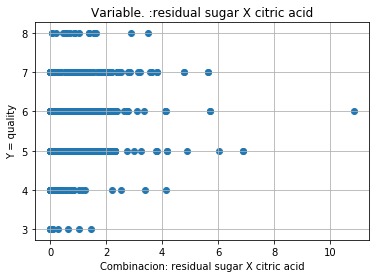

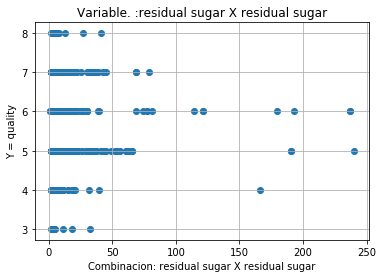

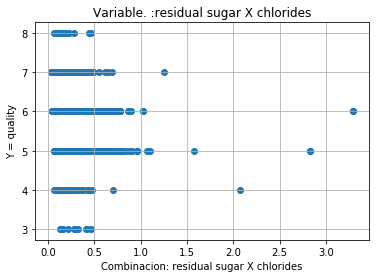

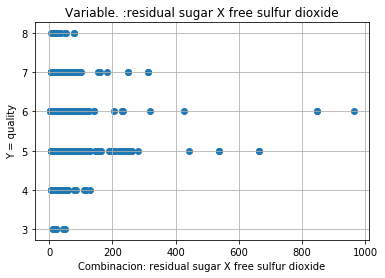

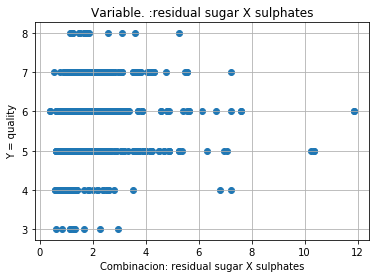

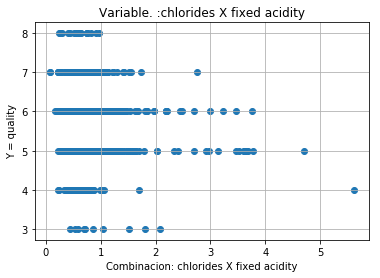

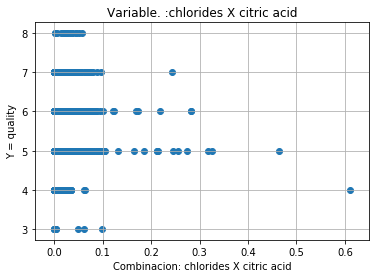

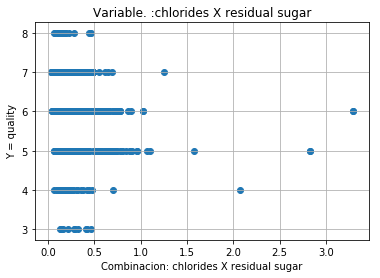

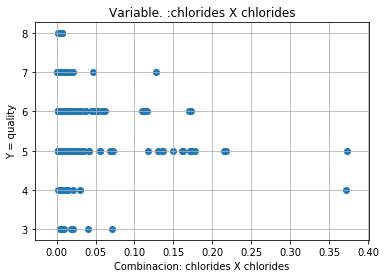

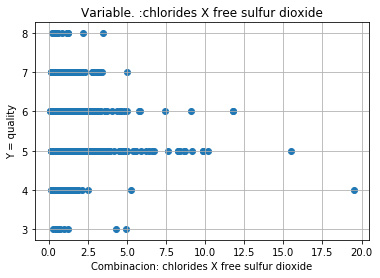

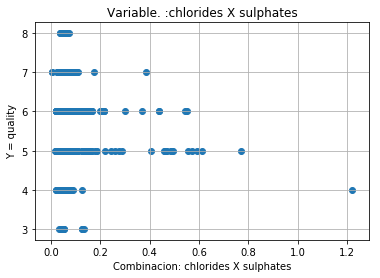

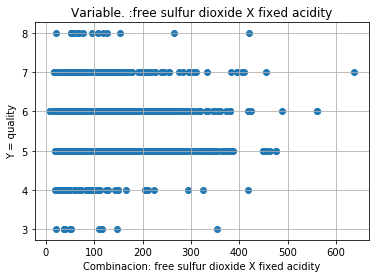

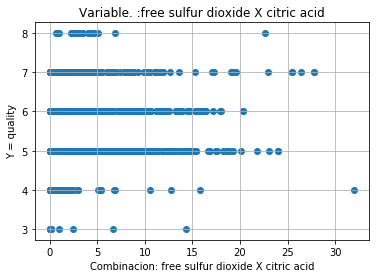

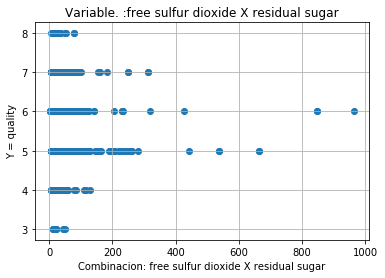

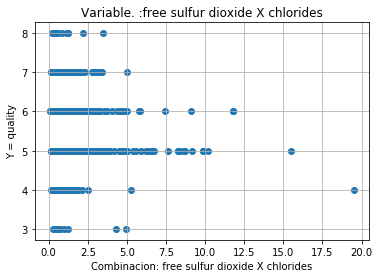

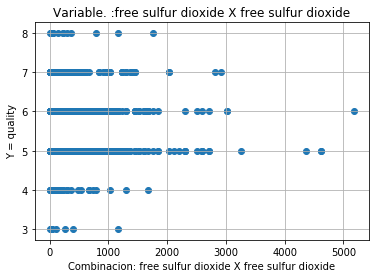

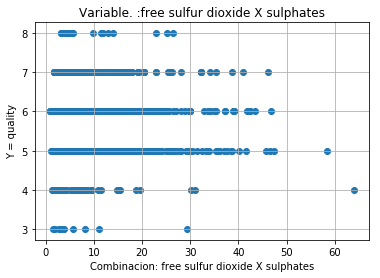

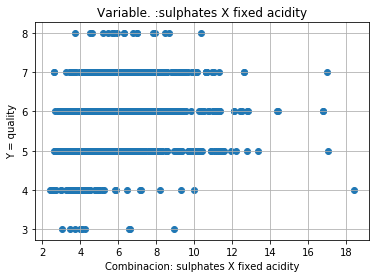

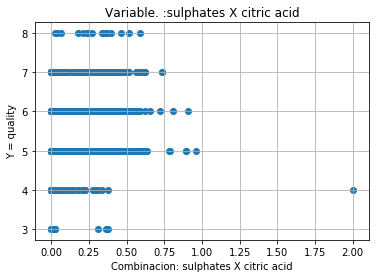

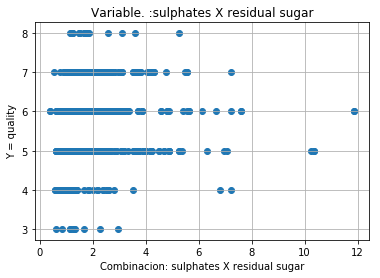

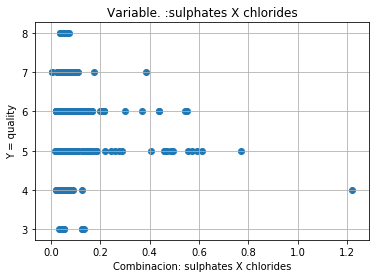

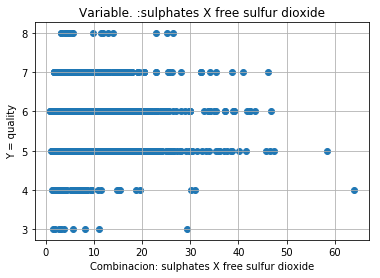

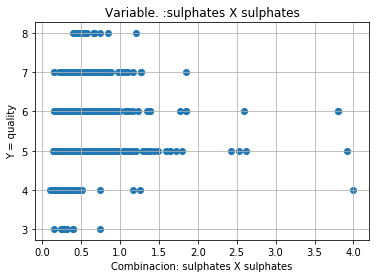

In [11]:
lista01 = []
for j in range (len(nonSignifDict)):
    lista01 = []
    for i in range(len(nonSignifDict)):
        lista01.append(data[nonSignifDict[j]]*data[nonSignifDict[i]])
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        ax.grid()
        ax.scatter(lista01[i],Y_real,label='Variable. :'+str(j)+' X '+str(i))
        ax.set_xlabel('Combinacion: '+str(nonSignifDict[j])+' X '+str(nonSignifDict[i]))
        ax.set_ylabel('Y = quality')
        ax.set_title('Variable. :'+str(nonSignifDict[j])+' X '+str(nonSignifDict[i]))
        plt.show()

**Se toman las siguientes combinaciones de variables para realizar tres distintos modelos**
* density - volatile acidity
* pH - density
* volatile acidity - pH

# Paso 2: Modelos a utilizar

In [12]:
#Features para el primer modelo:
aFeature01 = np.asanyarray(data['density'])
bFeature01 = np.asanyarray(data['volatile acidity'])

#Features para el segundo modelo:
aFeature02 = np.asanyarray(data['density'])
bFeature02 = np.asanyarray(data['pH'])

#Features para el tercer modelo:
aFeature03 = np.asanyarray(data['pH'])
bFeature03 = np.asanyarray(data['volatile acidity'])

# Paso 3: Analisis y evaluacion de modelo en tensorFlow con distintos Learning Rates

### Creacion del Grafo: (Polinomio de grado dos)

In [13]:
# Creacion del Grafo:
polinomialRegGraph = tf.Graph()

with polinomialRegGraph.as_default():
    # Creacion de las variables de parametros:
    
    
    with tf.name_scope('PureData') as scope:
        #Stablish variables, data inside the graph (Training Parameters), depends of the significance of the variable
        #it would be zero.
        
        weight0 = tf.Variable(0.8,name='W0')
        weight1 = tf.Variable(0.7,name='W1')
        weight2 = tf.Variable(0.6,name='W2')
        weight3 = tf.Variable(0.9,name='W3')
        weight4 = tf.Variable(0.5,name='W4')
        weight5 = tf.Variable(0.7,name='W5')
        
        #Stablish placeholders, data from outside the graph.
        a = tf.placeholder(dtype=tf.float32,name='a_feature') #density
        b = tf.placeholder(dtype=tf.float32,name='b_feature') #volatile acidity
        
        
        y = tf.placeholder(dtype=tf.float32,name='Y_hat')
        lr = tf.placeholder(dtype=tf.float16,name='LearningRate')
        
        #Initializing the variables
        initVar = tf.global_variables_initializer()
    
    # Prediction of Y acording to the model using tensor flow operations, hipothesis declaration:
    with tf.name_scope('Predict_Operation') as scope:
        #Y_hat  = b0 + b1*a + b2*b + b3*a^2 + b4*b^2 + b5*ab
        
        #Products Definition:
        firstProduct = tf.multiply(weight1,a)
        secondProduct = tf.multiply(weight2,b)
        thirdProduct = tf.multiply(weight3,tf.pow(a,2))
        fourthProduct = tf.multiply(weight4,tf.pow(b,2))
        fifthProduct = tf.multiply(weight5,tf.multiply(a,b))
        
        #sumatory Definition:
        firstSuma = tf.add(firstProduct,secondProduct)
        secondSuma = tf.add(thirdProduct,fourthProduct)
        thirdSuma = tf.add(fifthProduct,weight0)
        preHipothesis = tf.add(firstSuma,secondSuma)
        Y_hat = tf.add(preHipothesis,thirdSuma)
        
    # Minimize function, application of the gradiente descent:
    with tf.name_scope('ErrorFunction') as scope:
        error = 0.5*tf.reduce_mean(tf.pow((Y_real-Y_hat),2))
        errorTracking = tf.summary.scalar(name='ErrorTrack', tensor=error)
    
    # Graddient descent aplication:
    with tf.name_scope('OptimizerMethod') as scope:
        optim = tf.train.GradientDescentOptimizer(lr).minimize(error)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [14]:
def trainingFunction(ite,showError,learnR, aFeature, bFeature, mod):
    tf.reset_default_graph()
    with tf.Session(graph = polinomialRegGraph) as session:
        #First we have to create the write file directory:
        writer = tf.summary.FileWriter('./graphs/lr_'+str(learnR)+'_polinomioGradoDos '+ 'Mod'+str(mod),session.graph)
        session.run(initVar)
        #Now we start the training:
        for i in range(ite):
            #Execute the two main operations, preddiction and error calculation feeding the data from outside the graph
            _,c,errorValue,b0_val,b1_val,b2_val, b3_val,b4_val,b5_val = session.run([optim,errorTracking,error, weight0,weight1,weight2,weight3,weight4,weight5], feed_dict={lr:learnR, a:aFeature, b:bFeature, y:Y_real})
            
            
            writer.add_summary(c,i)
            if i%showError ==0:
                print('Epoch', i,"Err",errorValue,"w0",b0_val,"w1",b1_val,"w2",b2_val,
                     'w3',b3_val,'w4',b4_val,'w5',b5_val)    
        writer.close() 

### 3.1 Evaluacion del primer modelo con distinto learning rate

In [15]:
trainingFunction(ite=2000,showError=400,learnR=0.003,aFeature= aFeature01, bFeature=bFeature01, mod = 1)

Epoch 0 Err 3.3787313 w0 0.8072122 w1 0.70718783 w2 0.6034561 w3 0.9071636 w4 0.50182945 w5 0.70344454
Epoch 400 Err 0.5502924 w0 1.5018909 w1 1.3992527 w2 0.81101453 w3 1.5966264 w4 0.5308722 w5 0.9101987
Epoch 800 Err 0.4970942 w0 1.5698582 w1 1.4666427 w2 0.6969144 w3 1.6634451 w4 0.37638828 w5 0.7963319
Epoch 1200 Err 0.45467475 w0 1.6240824 w1 1.5203352 w2 0.59077746 w3 1.7166116 w4 0.23603256 w5 0.6903997
Epoch 1600 Err 0.42058578 w0 1.6726782 w1 1.56842 w2 0.4953978 w3 1.764189 w4 0.11052272 w5 0.5951868


In [16]:
trainingFunction(ite=20000,showError=4000,learnR=0.0003,aFeature= aFeature01, bFeature=bFeature01,mod =1)

Epoch 0 Err 3.3787313 w0 0.800721 w1 0.7007185 w2 0.60034555 w3 0.9007161 w4 0.50018287 w5 0.7003443
Epoch 4000 Err 0.55033815 w0 1.5014563 w1 1.3988234 w2 0.81120974 w3 1.5961995 w4 0.5312356 w5 0.91039264
Epoch 8000 Err 0.49713674 w0 1.5696714 w1 1.4664612 w2 0.69726545 w3 1.663264 w4 0.37685445 w5 0.7966815
Epoch 12000 Err 0.45472634 w0 1.6238981 w1 1.5201522 w2 0.5911418 w3 1.7164296 w4 0.23651117 w5 0.6907627
Epoch 16000 Err 0.4206415 w0 1.6724913 w1 1.568234 w2 0.49576825 w3 1.7640057 w4 0.111005 w5 0.5955556


In [17]:
trainingFunction(ite=60000,showError=12000,learnR=0.00003,aFeature= aFeature01, bFeature=bFeature01,mod =1)

Epoch 0 Err 3.3787313 w0 0.8000721 w1 0.7000718 w2 0.60003453 w3 0.90007156 w4 0.5000183 w5 0.7000344
Epoch 12000 Err 0.7941115 w0 1.2905197 w1 1.1888186 w2 0.81290215 w3 1.387126 w4 0.5983855 w5 0.9121735
Epoch 24000 Err 0.58892024 w0 1.4370148 w1 1.3347293 w2 0.8414763 w3 1.532455 w4 0.58664656 w5 0.94061565
Epoch 36000 Err 0.5569124 w0 1.4905553 w1 1.3879911 w2 0.8214109 w3 1.585443 w4 0.5465555 w5 0.9205736
Epoch 48000 Err 0.5385112 w0 1.5186478 w1 1.4158778 w2 0.7891333 w3 1.6131341 w4 0.5000323 w5 0.88836706


### 3.2 Evaluacion del segundo modelo con distinto learning rate

In [18]:
trainingFunction(ite=2000,showError=400,learnR=0.003,aFeature= aFeature02, bFeature=bFeature02,mod =2)

Epoch 0 Err 22.040344 w0 0.78035927 w1 0.6804237 w2 0.5346168 w3 0.88048786 w4 0.28186733 w5 0.6348332
Epoch 400 Err 0.343963 w0 0.77511567 w1 0.6749778 w2 0.48074543 w3 0.874842 w4 -0.018585926 w5 0.5803955
Epoch 800 Err 0.3415584 w0 0.79353833 w1 0.69310826 w2 0.5081413 w3 0.8926832 w4 -0.03963925 w5 0.60691565
Epoch 1200 Err 0.33949122 w0 0.8106498 w1 0.7099217 w2 0.5335861 w3 0.9092011 w4 -0.05915892 w5 0.63145584
Epoch 1600 Err 0.33771396 w0 0.8265459 w1 0.72551346 w2 0.5572217 w3 0.9244914 w4 -0.07725638 w5 0.6541599


In [19]:
trainingFunction(ite=20000,showError=4000,learnR=0.0003,aFeature= aFeature02, bFeature=bFeature02,mod =2)

Epoch 0 Err 22.040344 w0 0.7980366 w1 0.698043 w2 0.5934638 w3 0.89804935 w4 0.47819367 w5 0.6934854
Epoch 4000 Err 0.34396428 w0 0.7750658 w1 0.6749259 w2 0.48066717 w3 0.87478757 w4 -0.018525697 w5 0.58032006
Epoch 8000 Err 0.34156075 w0 0.7934881 w1 0.6930548 w2 0.5080527 w3 0.8926234 w4 -0.039572045 w5 0.6068293
Epoch 12000 Err 0.3394943 w0 0.810593 w1 0.7098647 w2 0.53348196 w3 0.9091412 w4 -0.059084687 w5 0.6313647
Epoch 16000 Err 0.33771744 w0 0.8264886 w1 0.72545576 w2 0.5571052 w3 0.924428 w4 -0.07717811 w5 0.65406936


In [20]:
trainingFunction(ite=60000,showError=12000,learnR=0.00003,aFeature= aFeature02, bFeature=bFeature02,mod =2)

Epoch 0 Err 22.040344 w0 0.79980373 w1 0.69980437 w2 0.59934664 w3 0.899805 w4 0.49782023 w5 0.6993488
Epoch 12000 Err 0.3458881 w0 0.7614184 w1 0.6611638 w2 0.4602163 w3 0.8612977 w4 -0.0027249833 w5 0.5603192
Epoch 24000 Err 0.34505177 w0 0.76714045 w1 0.66688585 w2 0.469157 w3 0.8670198 w4 -0.009518119 w5 0.56890225
Epoch 36000 Err 0.34424376 w0 0.7728625 w1 0.6726079 w2 0.47777173 w3 0.8727418 w4 -0.016215522 w5 0.5774853
Epoch 48000 Err 0.34346572 w0 0.77858454 w1 0.67832994 w2 0.48635027 w3 0.87846386 w4 -0.022789674 w5 0.5856805


### 3.3 Evaluacion del tercer modelo con distinto learning rate

In [21]:
trainingFunction(ite=2000,showError=400,learnR=0.003,aFeature= aFeature03, bFeature=bFeature03,mod =3)

Epoch 0 Err 42.66631 w0 0.7727869 w1 0.60929906 w2 0.58499 w3 0.5970329 w4 0.49078658 w5 0.64978516
Epoch 400 Err 0.49131033 w0 0.7880432 w1 0.5779126 w2 0.43213415 w3 0.21844229 w4 0.3070265 w5 0.09643804
Epoch 800 Err 0.39303 w0 0.83487123 w1 0.65961146 w2 0.3543035 w3 0.24436153 w4 0.20238623 w5 -0.20196258
Epoch 1200 Err 0.35332558 w0 0.8765998 w1 0.7301726 w2 0.30971307 w3 0.2529689 w4 0.138834 w5 -0.3861725
Epoch 1600 Err 0.33600822 w0 0.91473126 w1 0.793157 w2 0.28546757 w3 0.25117537 w4 0.1005759 w5 -0.50004417


In [22]:
trainingFunction(ite=2000,showError=400,learnR=0.0003,aFeature= aFeature03, bFeature=bFeature03,mod =3)

Epoch 0 Err 42.66631 w0 0.7972796 w1 0.69093275 w2 0.5984995 w3 0.8697129 w4 0.49907896 w5 0.6949801
Epoch 400 Err 0.70624316 w0 0.73943555 w1 0.4899361 w2 0.5480513 w3 0.17099035 w4 0.45771867 w5 0.5220274
Epoch 800 Err 0.6723462 w0 0.7451962 w1 0.5005353 w2 0.5323935 w3 0.17773709 w4 0.43756115 w5 0.4652588
Epoch 1200 Err 0.6415371 w0 0.7508532 w1 0.510899 w2 0.51752025 w3 0.18406823 w4 0.41836792 w5 0.41116846
Epoch 1600 Err 0.61353093 w0 0.75641185 w1 0.5210382 w2 0.50339407 w3 0.19000377 w4 0.40009314 w5 0.35962957


In [23]:
trainingFunction(ite=60000,showError=12000,learnR=0.00003,aFeature= aFeature03, bFeature=bFeature03,mod =3)

Epoch 0 Err 42.66631 w0 0.7997281 w1 0.69909364 w2 0.59985006 w3 0.8969725 w4 0.49990794 w5 0.6994982
Epoch 12000 Err 0.6415801 w0 0.7508213 w1 0.5108542 w2 0.517576 w3 0.18404861 w4 0.41843623 w5 0.41136256
Epoch 24000 Err 0.5649845 w0 0.7671711 w1 0.5406313 w2 0.47731164 w3 0.20073839 w4 0.3662071 w5 0.26396495
Epoch 36000 Err 0.50736904 w0 0.7827791 w1 0.5685935 w2 0.44286126 w3 0.21436812 w4 0.32113785 w5 0.13644443
Epoch 48000 Err 0.46395257 w0 0.7977265 w1 0.59501404 w2 0.41343582 w3 0.22533768 w4 0.28225446 w5 0.026113115


# Paso 4: Conclusiones

Si nos basamos unicamente en el error final que se tiene en cada modelo y con el respectivo learning rate utilizado, llegamos a la siguiente conclusion:

**El modelo numero 3 genera el menor error para el learning mas bajo (0.003).** Por tanto podemos concluir lo siguiente:

La combinacion de variables **volatile acidity - pH** es la que mejor predice la **calidad** del vino. Lo mas interesante es que con relativamente pocas epochs (2000) y con un learning rate relativamente alto (0.003) se logro un error mas bajo que con un learning rate mucho mas bajo (0.00003) y una cantidad de iteraciones mucho mayor (12 000) lo que nos indica que no necesariamente un Learning rate mas bajo y mayor numero de epechos es mejor.

En cuanto al modelo como tal, vemos que el parametro mas significativo es el **Biass (w0)**, seguido de la **density (w1)** mientras que **el valor menos significativo del modelo es la combinacion de las dos features, density * volatileacidity (w5)** ya que tiene el menor peso.

# Paso 5 Anexos: Imagenes del Grafo

### Grafo principal:

<img src="main.png">

### Grafos secundarios:

<img src="graph01.png">
<img src="graph02.png">
<img src="graph03.png">
<img src="graph04.png">

### Imagenes del error monitoreado

<img src="errors.png">

#### Modelo 01

<img src="error01_mod01.png">
<img src="error02_mod01.png">
<img src="error03_mod01.png">

#### Modelo 02

<img src="error01_mod02.png">
<img src="error02_mod02.png">
<img src="error03_mod02.png">

#### Modelo 03

<img src="error01_mod03.png">
<img src="error02_mod03.png">
<img src="error03_mod03.png">